<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/master/fmnist%20d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=10)
   # ,shuffle=True
#)

In [0]:
torch.set_printoptions(linewidth=120)

In [6]:
len(train_set)

60000

In [7]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [43]:
train_set.train_labels.bincount()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
sample = next(iter(train_set))
len(sample)
type(sample)
image, label = sample

In [45]:
image.shape

torch.Size([1, 28, 28])

In [46]:
type(label)

int

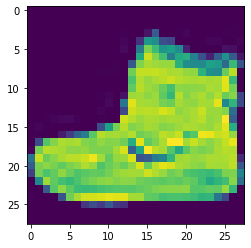

In [47]:
plt.imshow(image.squeeze())

Label : 9


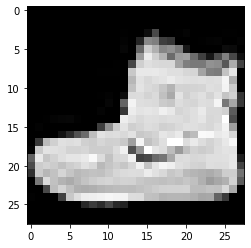

In [48]:
plt.imshow(image.squeeze(), cmap='gray')
print('Label :', label)

In [0]:
batch = next(iter(train_loader))

In [50]:
print(len(batch))
type(batch)


2


list

In [0]:
images, labels = batch

In [52]:
images.shape

torch.Size([10, 1, 28, 28])

In [53]:
labels.shape

torch.Size([10])

Labels :  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


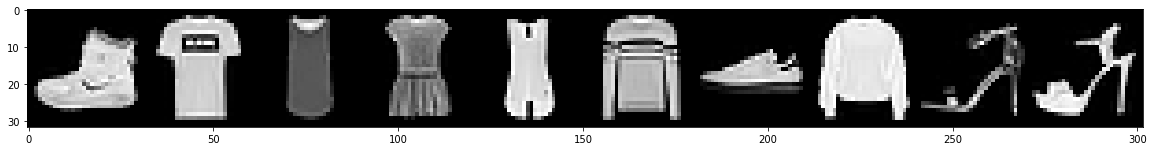

In [62]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid, (1,2,0)))
print("Labels : ", labels)

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=300)
batch1 = next(iter(train_loader))
images1, labels1 = batch1

Labels :  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


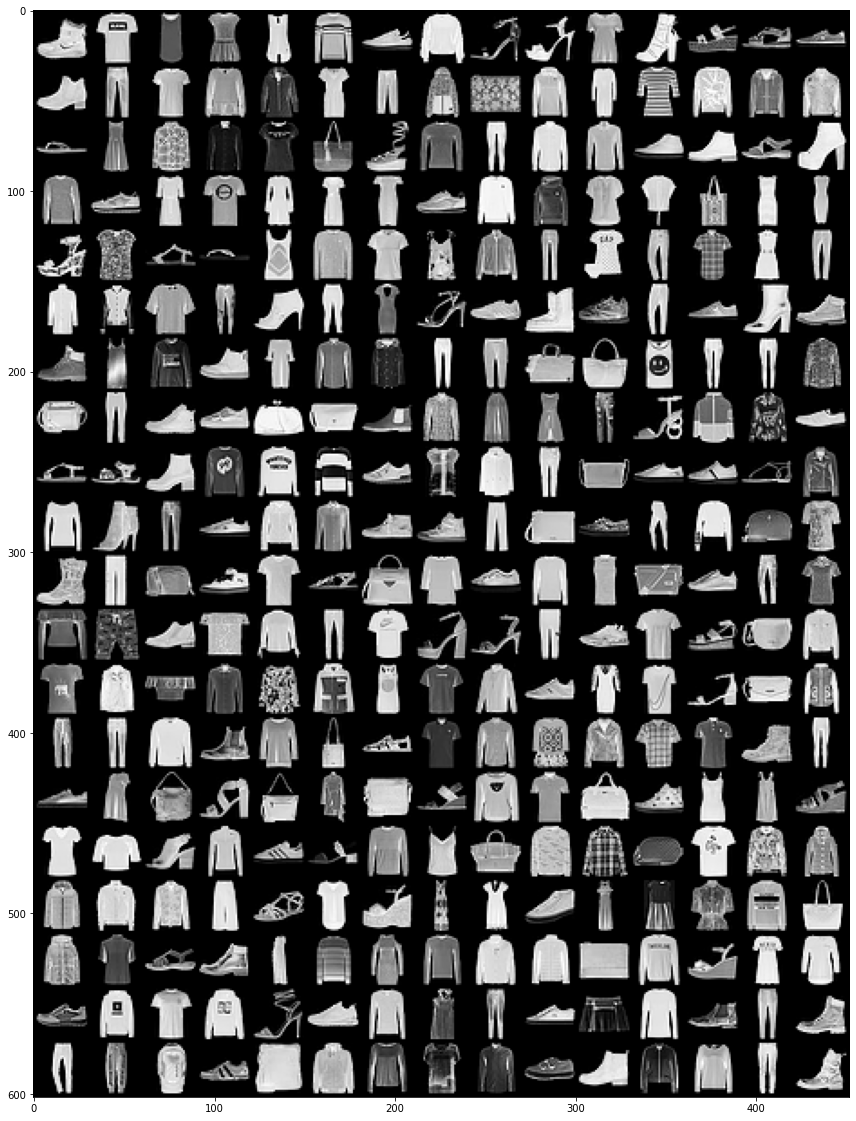

In [67]:
grid = torchvision.utils.make_grid(images1, nrow=15)
plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid, (1,2,0)))
print("Labels : ", labels)

**BUILDING NEURAL NETWORK NOW**

---

## MODEL BUILDING

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        return t